<a href="https://colab.research.google.com/github/Niitesh122/Niitesh-IBP-Assignment_2023/blob/main/IBP_Assignment_19623085_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [ ]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-29 13:21:04--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-29 13:21:05--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  35.3MB/s    in 26s     

2023-05-29 13:21:32 (31.

In [ ]:
#import module for connection to database
import sqlite3

In [ ]:
#establish connection with database
conn = sqlite3.connect("enron.db")

In [ ]:
#create cursor object
cur = conn.cursor()

In [ ]:
#check schema of database
sql = """
SELECT name 
FROM sqlite_master
WHERE type = "table";
"""
cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [ ]:
#check schema of database
sql = "PRAGMA table_info('employeelist')"
cur.execute(sql)
rows = cur.fetchall()

for row in rows:
    print(row)

(0, 'eid', 'INTEGER', 1, None, 1)
(1, 'firstName', 'VARCHAR(31)', 1, "''", 0)
(2, 'lastName', 'VARCHAR(31)', 1, "''", 0)
(3, 'Email_id', 'VARCHAR(31)', 1, "''", 0)
(4, 'Email2', 'VARCHAR(31)', 0, None, 0)
(5, 'Email3', 'VARCHAR(31)', 0, None, 0)
(6, 'EMail4', 'VARCHAR(31)', 0, None, 0)
(7, 'folder', 'VARCHAR(31)', 1, "''", 0)
(8, 'status', 'VARCHAR(50)', 0, None, 0)


In [ ]:
#check schema of table users using PRAGMA
sql = """
PRAGMA table_info('message');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [ ]:
#check schema of table users using PRAGMA
sql = """
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [ ]:
#check schema of table users using PRAGMA
sql = """
PRAGMA table_info('referenceinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

In [ ]:
import pandas as pd

sql ='''
SELECT * from employeelist;
'''
employees_df = pd.read_sql_query(sql, conn)
employees_df

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee
...,...,...,...,...,...,...,...,...,...
144,146,Steven,South,steven.p.south@enron.com,steven.south@enron.com,p..south@enron.com,,south-s,N/A
145,147,Carol,Clair,carol.clair@enron.com,carol.st.clair@enron.com,carol.stclair@enron.com,,stclair-c,Vice President
146,148,Chris,Stokley,chris.stokley@enron.com,,,,stokley-c,N/A
147,149,Kate,Symes,kate.symes@enron.com,ksymes@enron.com,,,symes-k,Employee


In [ ]:
#using pandas library to read database
import pandas as pd

sql='''
SELECT * from message;
'''
# Load the data into a DataFrame
message_df = pd.read_sql_query(sql, conn)
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [ ]:
import pandas as pd

# SQL query to select all rows from the "Recipientinfo" table
sql = '''
SELECT * FROM Recipientinfo;
'''

# Execute the SQL query and store the results in a DataFrame
recipients_df = pd.read_sql_query(sql, conn)

# Print the resulting DataFrame
recipients_df


,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None
...,...,...,...,...,...
2064437,3242059,404927,BCC,john.anderson@enron.com,None
2064438,3242060,404927,BCC,mark.guzman@enron.com,None
2064439,3242061,404927,BCC,michael.mier@enron.com,None
2064440,3242062,404927,BCC,pete.davis@enron.com,None


In [ ]:
import pandas as pd

# SQL query to select all rows from the "Referenceinfo" table
sql = '''
SELECT * FROM Referenceinfo;
'''

# Execute the SQL query and store the results in a DataFrame
references_df = pd.read_sql_query(sql, conn)

# Print the resulting DataFrame
references_df


,rfid,mid,reference
0,2,79,"> From: Le Vine, Debi> Sent: Thursday, August ..."
1,3,99,"> From: Golden, Mark> Sent: Thursday, August 2..."
2,8,533,"From: Sole, JeanneSent: Friday, August 18, 200..."
3,13,842,"From: \tGrigsby, Mike Sent:\tThursday, March ..."
4,14,845,"From: Monaco, John [EM] [mailto:john.monaco@ci..."
...,...,...,...
54773,63020,404873,From: \tEnron Announcements/Corp/Enron@ENRON ...
54774,63021,404888,"From: \tBlair, Kit Sent:\tWednesday, November..."
54775,63022,404907,"From: \tDean, Craig Sent:\tThursday, January ..."
54776,63023,404918,"From: \tDean, Craig Sent:\tTuesday, February ..."


In [ ]:
#checking the number of columns with missing values
message_df.isnull().sum()

mid           0
sender        0
date          0
message_id    0
subject       0
body          0
folder        0
dtype: int64

In [ ]:
condition = message_df['date']
condition

0         2000-01-21 04:51:00
1         2000-01-24 01:37:00
2         2000-01-24 02:06:00
3         2000-02-02 10:21:00
4         2000-02-07 22:16:00
                 ...         
252754    2002-02-06 16:51:29
252755    2002-02-06 17:17:39
252756    2002-02-06 20:09:37
252757    2002-02-07 04:38:13
252758    2002-02-07 05:38:14
Name: date, Length: 252759, dtype: object

In [ ]:
message_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252759 entries, 0 to 252758
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mid         252759 non-null  int64 
 1   sender      252759 non-null  object
 2   date        252759 non-null  object
 3   message_id  252759 non-null  object
 4   subject     252759 non-null  object
 5   body        252759 non-null  object
 6   folder      252759 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.5+ MB


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# SQL query to select the date and count of emails from the "Message" table
sql = """
    SELECT DATE(date) AS email_date, COUNT(*) AS email_count
    FROM Message
    GROUP BY email_date
    ORDER BY email_date
"""

# Execute the SQL query and fetch the results
email_count = cur.fetchall()

# Execute the SQL query and store the results in a DataFrame
email_count = pd.read_sql_query(sql, conn)

# Print the resulting DataFrame
email_count


,email_date,email_count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
1318,2020-12-24,1
1319,2020-12-29,1
1320,2043-12-28,1
1321,2044-01-02,1


       email_day  email_count
0     0001-05-30            2
1     0001-06-18            1
2     0001-07-24            1
3     0001-08-01            1
4     0001-08-06            1
...          ...          ...
1318  2020-12-24            1
1319  2020-12-29            1
1320  2043-12-28            1
1321  2044-01-02            1
1322  2044-01-04            2

[1323 rows x 2 columns]


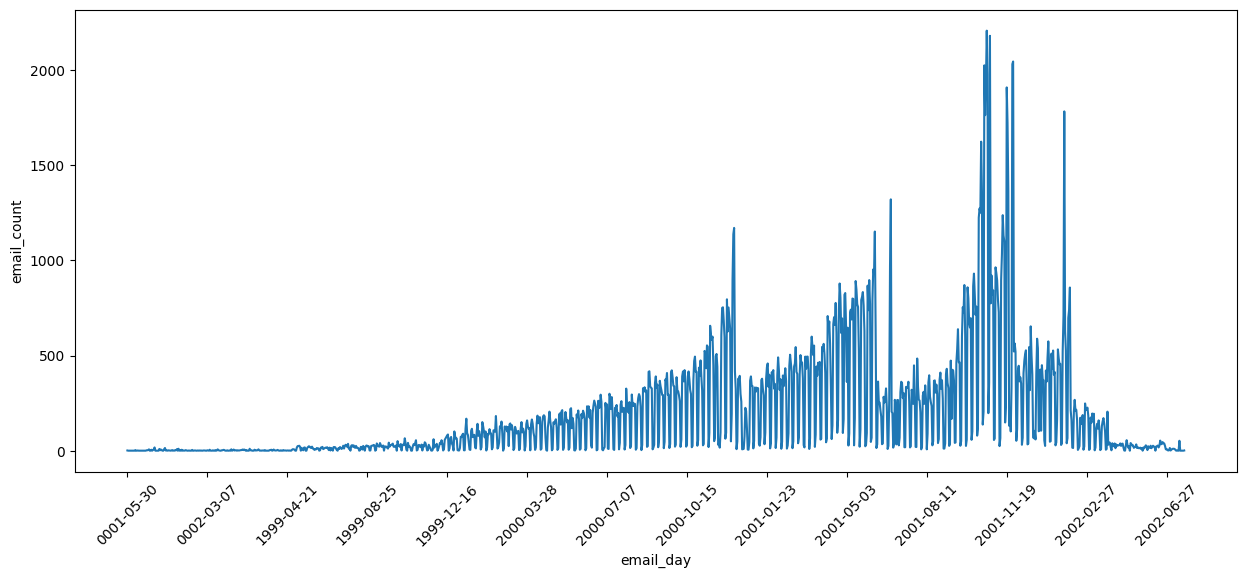

In [ ]:
#write sql query to count number of emails per day using strftime and COUNT() 

# Write the SQL query to count the number of emails per day
sql = '''
    SELECT strftime('%Y-%m-%d', date) AS email_day, COUNT(*) AS email_count
    FROM message
    GROUP BY email_day
    ORDER BY email_day
'''

# Load the data into a DataFrame
email_count = pd.read_sql_query(sql, conn)

# Display the DataFrame
print(email_count)

# Plot the line chart
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=email_count, x='email_day', y='email_count', ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xticks(rotation=45)


# Display the plot
plt.show()


    email_week  email_count
0      0001-22            2
1      0001-25            1
2      0001-30            1
3      0001-31            1
4      0001-32            1
..         ...          ...
242    2020-51            1
243    2020-52            1
244    2043-52            1
245    2044-00            1
246    2044-01            2

[247 rows x 2 columns]


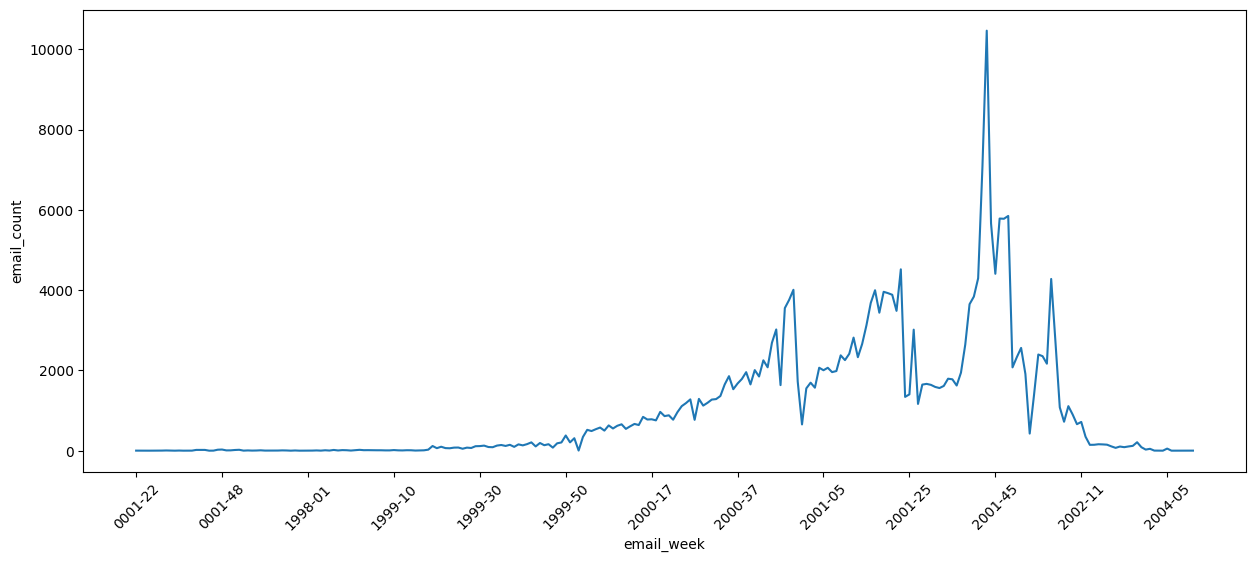

In [ ]:
#write sql query to count number of emails per week using strftime and COUNT() 

sql = '''
    SELECT strftime('%Y-%W', date) AS email_week, COUNT(*) AS email_count
    FROM message
    GROUP BY email_week
    ORDER BY email_week
'''
# Load the data into a DataFrame
email_count = pd.read_sql_query(sql, conn)
# Display the DataFrame
print(email_count)

# Plot the line chart
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=email_count, x='email_week', y='email_count', ax=ax)
# Adjust x-axis tick frequency for better readability
ax.xaxis.set_major_locator(plt.MaxNLocator(15))  # Adjust the number of ticks as needed.
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

# Display the plot
plt.show()

   email_month  email_count
0      0001-05            2
1      0001-06            1
2      0001-07            1
3      0001-08           12
4      0001-09            9
..         ...          ...
63     2004-02           53
64     2007-02            1
65     2020-12            2
66     2043-12            1
67     2044-01            3

[68 rows x 2 columns]


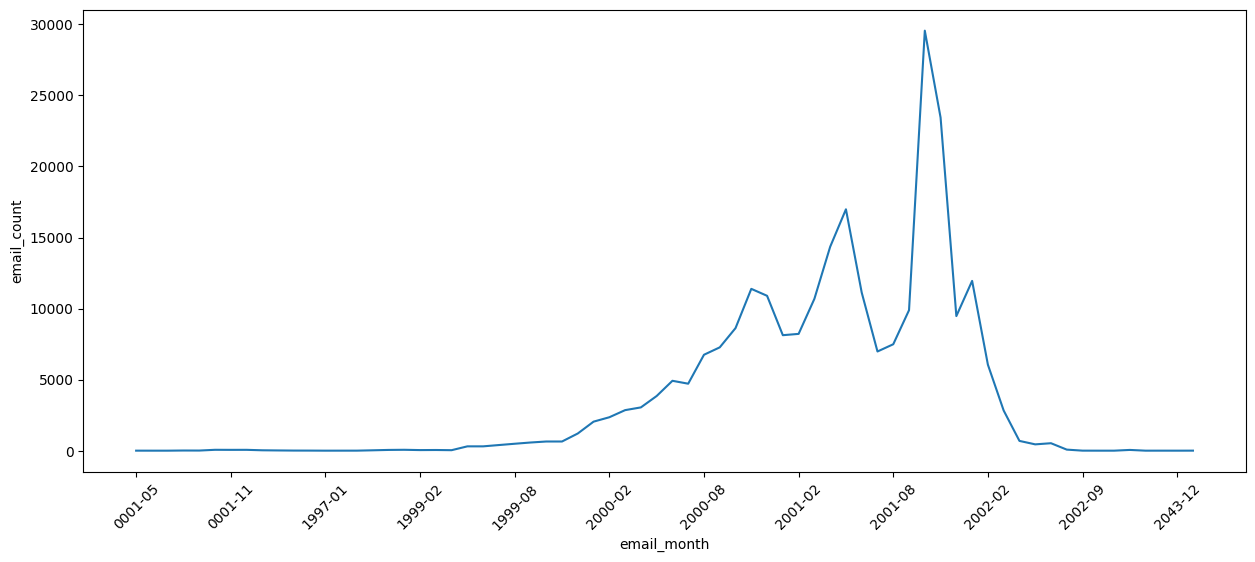

In [ ]:
# Write the SQL query to count the number of emails per month
sql = '''
    SELECT strftime('%Y-%m', date) AS email_month, COUNT(*) AS email_count
    FROM message
    GROUP BY email_month
    ORDER BY email_month
'''

# Load the data into a DataFrame
email_count = pd.read_sql_query(sql, conn)

# Display the DataFrame
print(email_count)

# Plot the line chart
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=email_count, x='email_month', y='email_count', ax=ax)
plt.xticks(rotation=45)

# Adjust x-axis tick frequency for better readability
ax.xaxis.set_major_locator(plt.MaxNLocator(13))  # Adjust the number of ticks as needed

# Display the plot
plt.show()

                          sender  email_count
0        jeff.dasovich@enron.com         6273
1           j.kaminski@enron.com         5838
2             kay.mann@enron.com         5100
3      sara.shackleton@enron.com         4797
4           tana.jones@enron.com         4437
5        chris.germany@enron.com         3686
6           no.address@enron.com         3511
7  enron.announcements@enron.com         2838
8      matthew.lenhart@enron.com         2784
9    debra.perlingiere@enron.com         2549


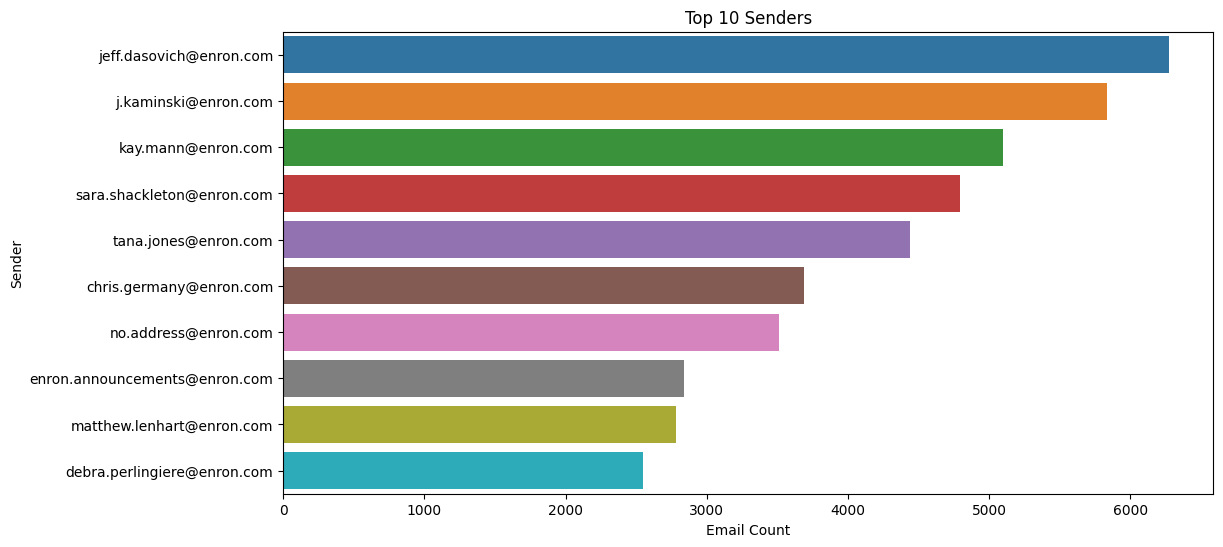

In [ ]:
# Write the SQL query to count the top senders
sql = '''
    SELECT sender, COUNT(*) AS email_count
    FROM message
    GROUP BY sender
    ORDER BY email_count DESC
    LIMIT 10
'''

# Load the data into a DataFrame
top_senders = pd.read_sql_query(sql, conn)

# Display the DataFrame
print(top_senders)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=top_senders, x='email_count', y='sender', ax=ax)

# Set labels and title
ax.set_xlabel('Email Count')
ax.set_ylabel('Sender')
ax.set_title('Top 10 Senders')

# Display the plot
plt.show()

#perform analysis 



                   Recipient  Recipient_Count
0       no.address@enron.com            19198
1    jeff.dasovich@enron.com            11137
2  richard.shapiro@enron.com            11015
3    steven.j.kean@enron.com            10873
4  james.d.steffes@enron.com            10615
5       tana.jones@enron.com             9781
6  sara.shackleton@enron.com             9633
7    mark.e.taylor@enron.com             9090
8   louise.kitchen@enron.com             7603
9       pete.davis@enron.com             7509


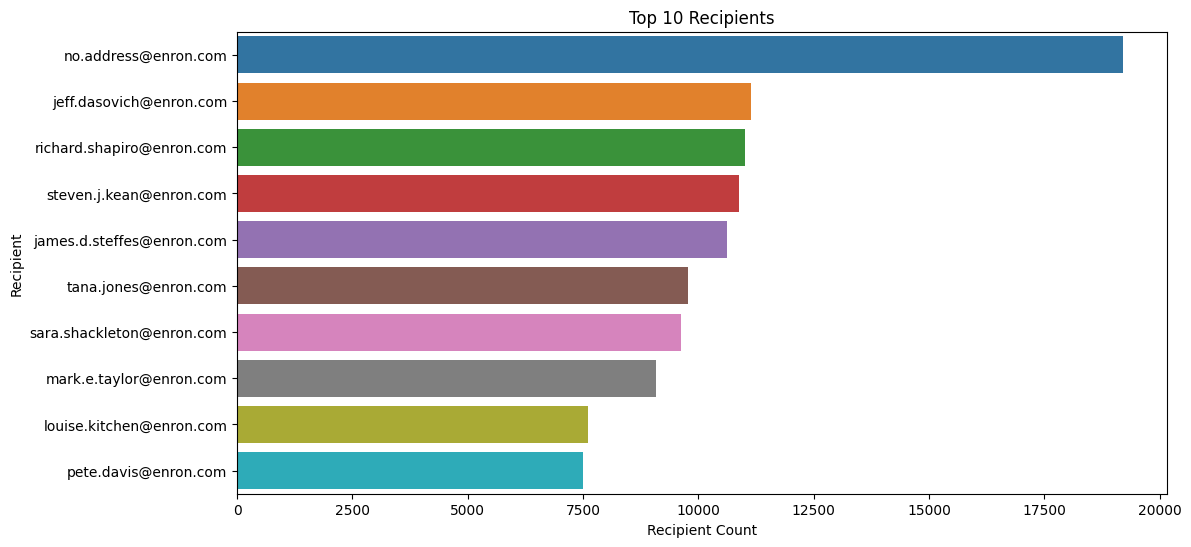

In [ ]:
recipient_query = """
    SELECT rvalue AS Recipient, COUNT(*) AS Recipient_Count
    FROM recipientinfo
    GROUP BY rvalue
    ORDER BY Recipient_Count DESC
    LIMIT 10
"""

# Load the data into a DataFrame
recipient_data = pd.read_sql_query(recipient_query, conn)

# Display the DataFrame
print(recipient_data)

# Plot the bar chart for recipients
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=recipient_data, x='Recipient_Count', y='Recipient', ax=ax)

# Set labels and title for recipients
ax.set_xlabel('Recipient Count')
ax.set_ylabel('Recipient')
ax.set_title('Top 10 Recipients')

# Display the plot for recipients
plt.show()

#perform analysis 


  rtype  rtype_count
0   BCC       253713
1    CC       253735
2    TO      1556994


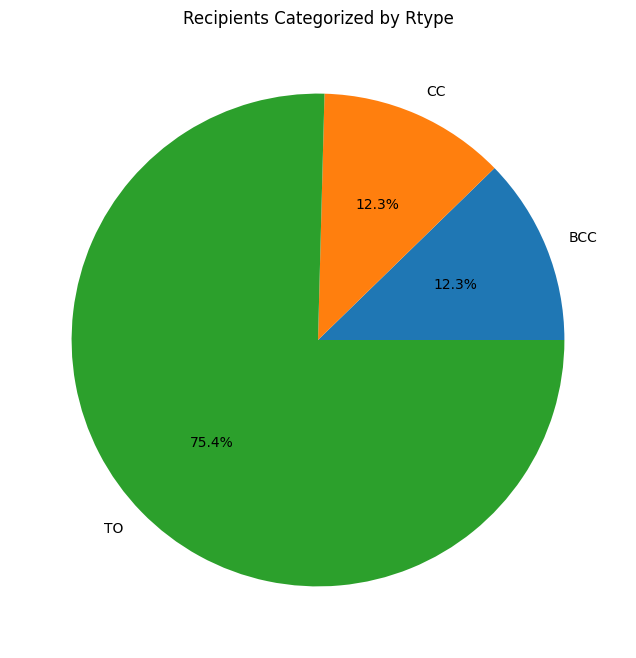

In [ ]:
# Write the SQL query to categorize recipients by rtype and count the occurrences
rtype_query = """
    SELECT rtype, COUNT(*) AS rtype_count
    FROM recipientinfo
    GROUP BY rtype
"""

# Load the data into a DataFrame
rtype_data = pd.read_sql_query(rtype_query, conn)

# Display the DataFrame
print(rtype_data)

# Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(rtype_data['rtype_count'], labels=rtype_data['rtype'], autopct='%1.1f%%')

# Set title
ax.set_title('Recipients Categorized by Rtype')

# Display the plot
plt.show()

#perform analysis 